In [0]:
from google.colab import drive
drive.mount('/gdrive')

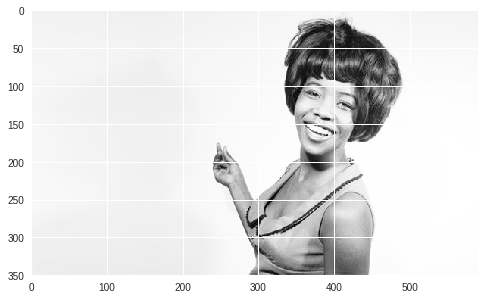

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#uploading file from local system

#from google.colab import files
#uploaded = files.upload()
#reading the image using cv2.imread

input_image=cv2.imread("task1.jpg",0) #make sure the path to the image is in String format
for x in range(len(input_image)):
  for y in range(len(input_image[0])):
      input_image[x,y]=255-input_image[x,y]
plt.imshow(input_image) 
#print(input_image)
#plt.imshow(input_image)


Function for creating gaussian blur kernel

In [0]:
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)  
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel
#plt.imshow(gkern(21,10))

def create_octave(mat):
  row_indices=[]
  row_index=0
  while(row_index<len(mat)):
    row_indices.append(row_index)
    row_index=row_index+2
  
  col_indices=[]
  col_index=0
  while(col_index<len(mat[0])):
    col_indices.append(col_index)
    col_index=col_index+2
  
  mat2=np.delete(mat,row_indices,axis=0)
  mat2=np.delete(mat2,col_indices,axis=1)
  return(mat2)

import numpy as np
def gaussian_blur(input_image,sig):
    kernel=gkern(5,sig)
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)

    for input_x in range(len(input_image)):
      for input_y in range(len(input_image[0])):
         padded_input[input_x,input_y]=0
         for kernel_x in range(len(kernel)):
             for kernel_y in range(len(kernel[0])):
                 padded_input[input_x,input_y]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x, input_y+kernel_y]*kernel[kernel_x,kernel_y]
      return(padded_input)   

Developing 4 octaves

In [0]:
print(1/pow(2,0.5))

0.7071067811865475


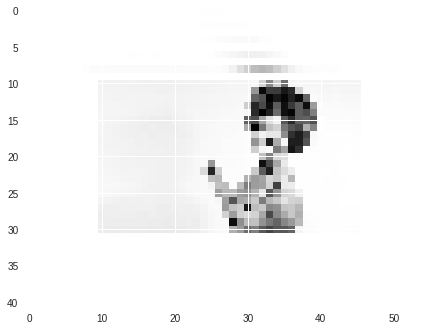

In [48]:
gaussian_sig=[[1/pow(2,0.5),1,pow(2,0.5),2,2*pow(2,0.5)],[pow(2,0.5),2,2*pow(2,0.5),4,4*pow(2,0.5)],[2*pow(2,0.5),4,4*pow(2,0.5),8,8*pow(2,0.5)],[4*pow(2,0.5),8,8*pow(2,0.5),16,16*pow(2,0.5)]]
 
#1st Octave
oct_one=create_octave(input_image)
oct_one_blur=oct_one
for sig in gaussian_sig[0]:
  oct_one_blur=gaussian_blur(oct_one_blur,sig)

#2nd Octave
oct_two=create_octave(oct_one)
oct_two_blur=oct_two
for sig in gaussian_sig[1]:
  oct_two_blur=gaussian_blur(oct_two_blur,sig)

#2nd Octave
oct_three=create_octave(oct_two)
oct_three_blur=oct_three
for sig in gaussian_sig[1]:
  oct_three_blur=gaussian_blur(oct_three_blur,sig)

#2nd Octave
oct_four=create_octave(oct_three)
oct_four_blur=oct_four
for sig in gaussian_sig[1]:
  oct_four_blur=gaussian_blur(oct_four_blur,sig)
plt.imshow(oct_four_blur)

Applying gaussian blurring.


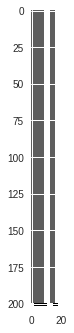

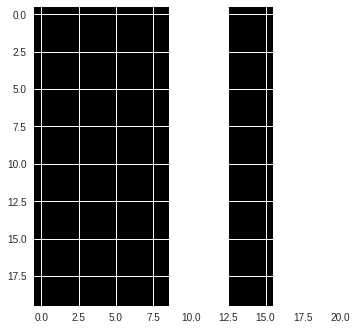

In [18]:
input_image=np.array([[10,10,10,10,10,10,10,10,10,0,0,0,0,10,10,10,0,0,0,0,0] for i in range(20)])
plt.imshow(input_image)

Gaussian kernel[1]

[[1.41776101e-13 2.83889823e-08 3.19753425e-07 2.83889823e-08
  1.41763908e-13]
 [2.83889823e-08 5.68455692e-03 6.40268301e-02 5.68455692e-03
  2.83865408e-08]
 [3.19753425e-07 6.40268301e-02 7.21152946e-01 6.40268301e-02
  3.19725926e-07]
 [2.83889823e-08 5.68455692e-03 6.40268301e-02 5.68455692e-03
  2.83865408e-08]
 [1.41763908e-13 2.83865408e-08 3.19725926e-07 2.83865408e-08
  1.41751716e-13]]


[1] https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy

In [25]:
input_image=np.array([[10,10,10,10,10,0,0,0,0,0] for i in range(10)])
input_image.all(1,4)

TypeError: ignored

Octave creation: dimensionality reduction of image

In [31]:
def create_octave(mat):
  row_indices=[]
  row_index=0
  while(row_index<len(mat)):
    row_indices.append(row_index)
    row_index=row_index+2
  
  col_indices=[]
  col_index=0
  while(col_index<len(mat[0])):
    col_indices.append(col_index)
    col_index=col_index+2
  mat2=np.delete(mat,row_indices,axis=0)
  mat2=np.delete(mat2,col_indices,axis=1)
  return(mat2)


array([[8, 4]])